In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
import os
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
os.chdir('C:\\Users\\Dell\\Desktop\\ProjectSales Department\\')

In [4]:
os.getcwd()

'C:\\Users\\Dell\\Desktop\\ProjectSales Department'

In [6]:
sales_train_df = pd.read_csv('train.csv')
sales_train_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_1520\2779644468.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
sales_train_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [10]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
store_info_df = pd.read_csv('store.csv')
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
display (store_info_df[store_info_df['CompetitionDistance'].isna()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
store_info_df['CompetitionDistance'] = store_info_df['CompetitionDistance'].fillna(0)
store_info_df['CompetitionOpenSinceMonth'] = store_info_df['CompetitionOpenSinceMonth'].fillna(0)
store_info_df['CompetitionOpenSinceYear'] = store_info_df['CompetitionOpenSinceYear'].fillna(0)
store_info_df['Promo2SinceWeek'] = store_info_df['Promo2SinceWeek'].fillna(0)
store_info_df['Promo2SinceYear'] = store_info_df['Promo2SinceYear'].fillna(0)
store_info_df['PromoInterval'] = store_info_df['PromoInterval'].fillna(0)

In [16]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [17]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [18]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
finaltable1=pd.merge(sales_train_df, store_info_df, on='Store', how='left')
finaltable1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [20]:
finaltable1.loc[finaltable1['StateHoliday']=='0', 'StateHoliday'] = 0
finaltable1.loc[finaltable1['StateHoliday']=='a', 'StateHoliday'] = 1
finaltable1.loc[finaltable1['StateHoliday']=='b', 'StateHoliday'] = 2
finaltable1.loc[finaltable1['StateHoliday']=='c', 'StateHoliday'] = 3
finaltable1.loc[finaltable1['Assortment']=='a', 'Assortment'] = 0
finaltable1.loc[finaltable1['Assortment']=='b', 'Assortment'] = 1
finaltable1.loc[finaltable1['Assortment']=='c', 'Assortment'] = 2
finaltable1.loc[finaltable1['StoreType']=='a', 'StoreType'] = 0
finaltable1.loc[finaltable1['StoreType']=='b', 'StoreType'] = 1
finaltable1.loc[finaltable1['StoreType']=='c', 'StoreType'] = 2
finaltable1.loc[finaltable1['StoreType']=='d', 'StoreType'] = 3
finaltable1['StateHoliday'] = finaltable1['StateHoliday'].astype('int64')
finaltable1['Assortment'] = finaltable1['Assortment'].astype('int64')
finaltable1['StoreType'] = finaltable1['StoreType'].astype('int64')


In [21]:
finaltable1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870.0,0.0,0.0,0,0.0,0.0,0


In [22]:
finaltable1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [23]:
finaltable1['Date'] = pd.to_datetime(finaltable1['Date'], format= '%Y-%m-%d')

In [24]:
finaltable1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [25]:
finaltable1['CompetitionOpenSinceMonth']= finaltable1['CompetitionOpenSinceMonth'].astype(int)
finaltable1['CompetitionOpenSinceYear']= finaltable1['CompetitionOpenSinceYear'].astype(int)
finaltable1['Promo2SinceYear']= finaltable1['Promo2SinceYear'].astype(int)
finaltable1['Promo2SinceWeek']= finaltable1['Promo2SinceWeek'].astype(int)
finaltable1['CompetitionDistance']= finaltable1['CompetitionDistance'].astype(int)

In [26]:
finaltable1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [27]:
finaltable1['CompetitionOpenSinceMonth']= pd.DatetimeIndex(finaltable1['Date']).month
finaltable1['CompetitionOpenSinceYear']= finaltable1['CompetitionOpenSinceYear'].astype(int)
finaltable1['Promo2SinceYear']= finaltable1['Promo2SinceYear'].astype(int)
finaltable1['Promo2SinceWeek']= finaltable1['Promo2SinceWeek'].astype(int)
finaltable1['CompetitionDistance']= finaltable1['CompetitionDistance'].astype(int)

In [28]:
finaltable1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

Text(0.5, 1.0, 'Plot between Sales and Competition Since Year')

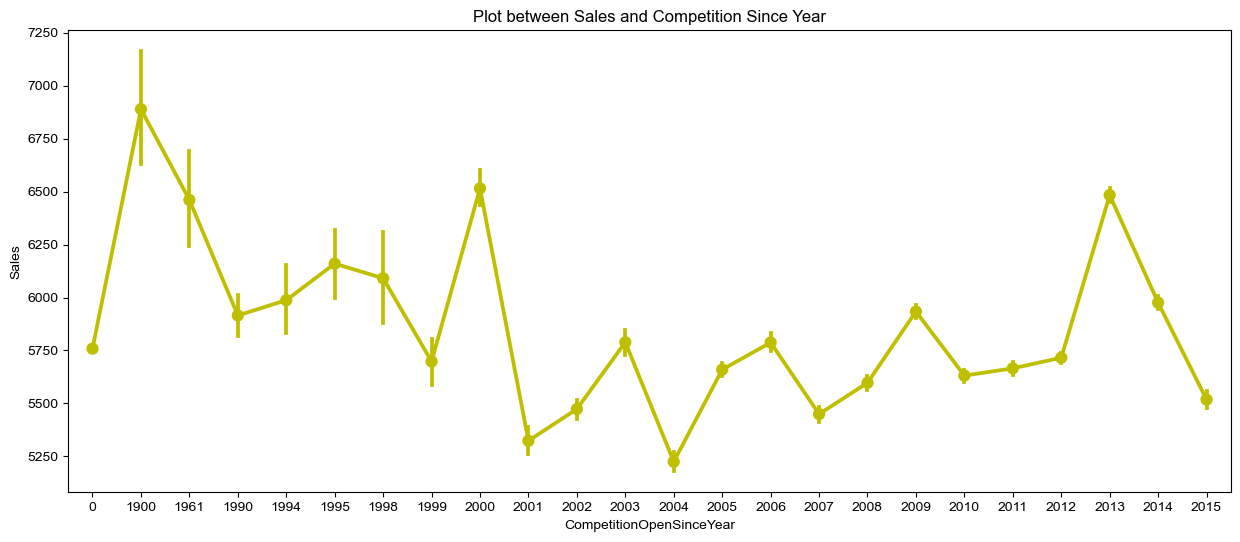

In [29]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear' , y= 'Sales' , data=finaltable1, color='y')
sns.set_style('dark')
plt.title('Plot between Sales and Competition Since Year')

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since Year')

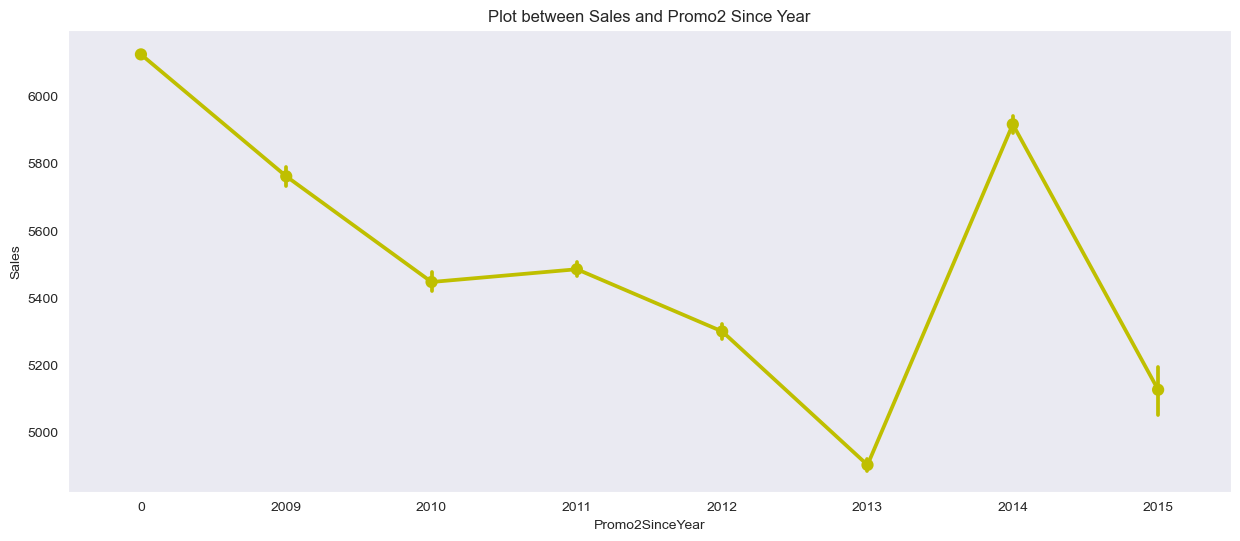

In [30]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear' , y= 'Sales' , data=finaltable1, color='y')
sns.set_style('dark')
plt.title('Plot between Sales and Promo2 Since Year')

Text(0.5, 1.0, 'Plot between Sales and Day Of Week')

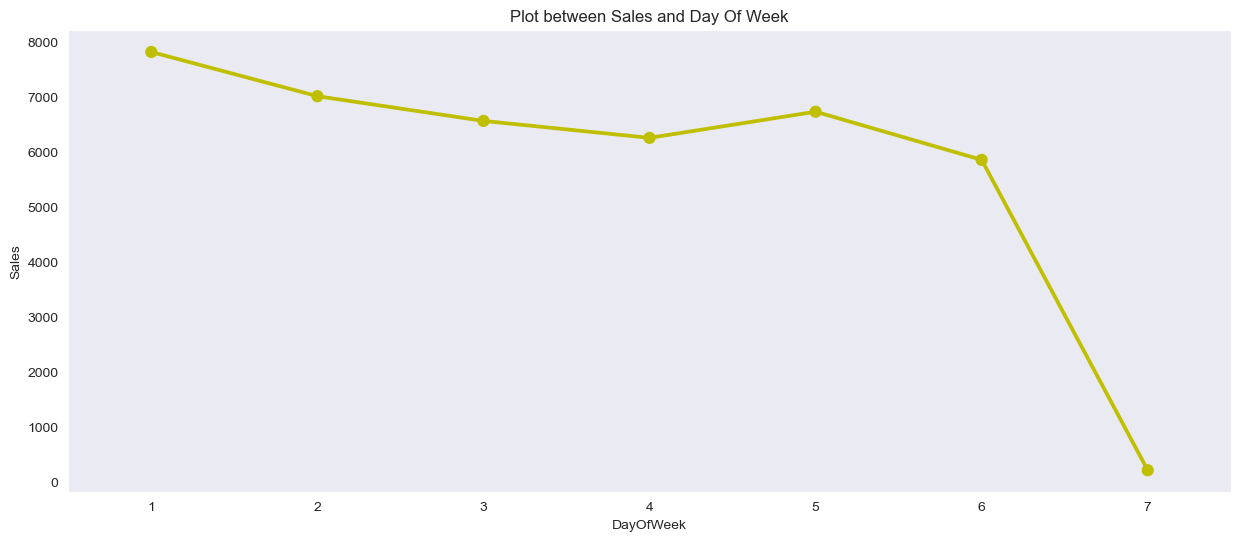

In [31]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek' , y= 'Sales' , data=finaltable1, color='y')
sns.set_style('dark')
plt.title('Plot between Sales and Day Of Week')

Text(0.5, 1.0, 'Plot between Sales and Competition Since Month')

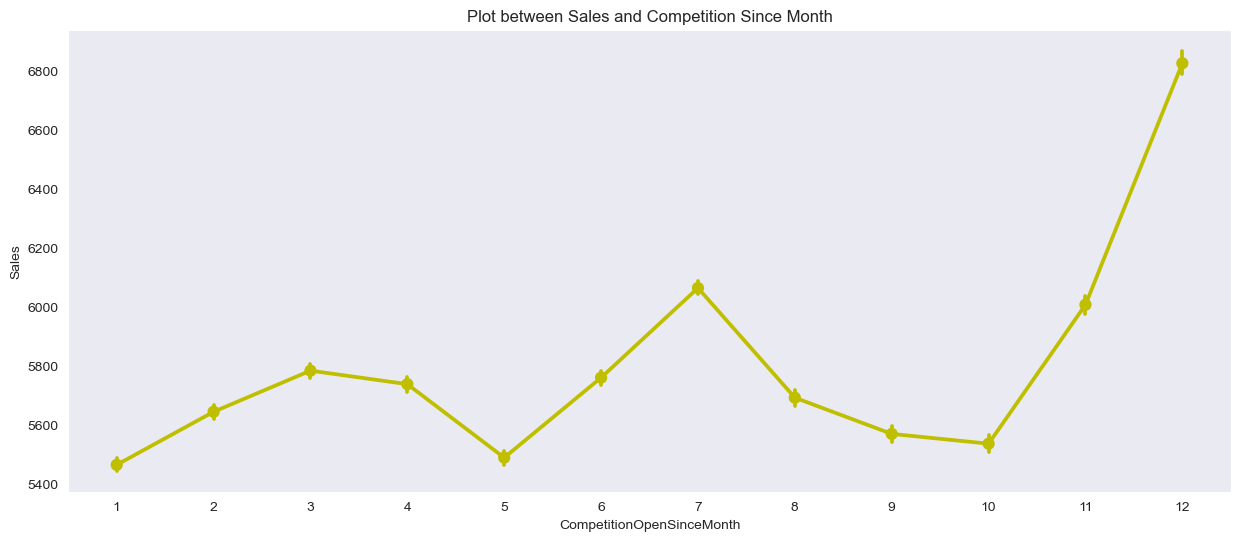

In [32]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth' , y= 'Sales' , data=finaltable1, color='y')
sns.set_style('dark')
plt.title('Plot between Sales and Competition Since Month')

Text(0.5, 1.0, 'Boxplot For Sales Values')

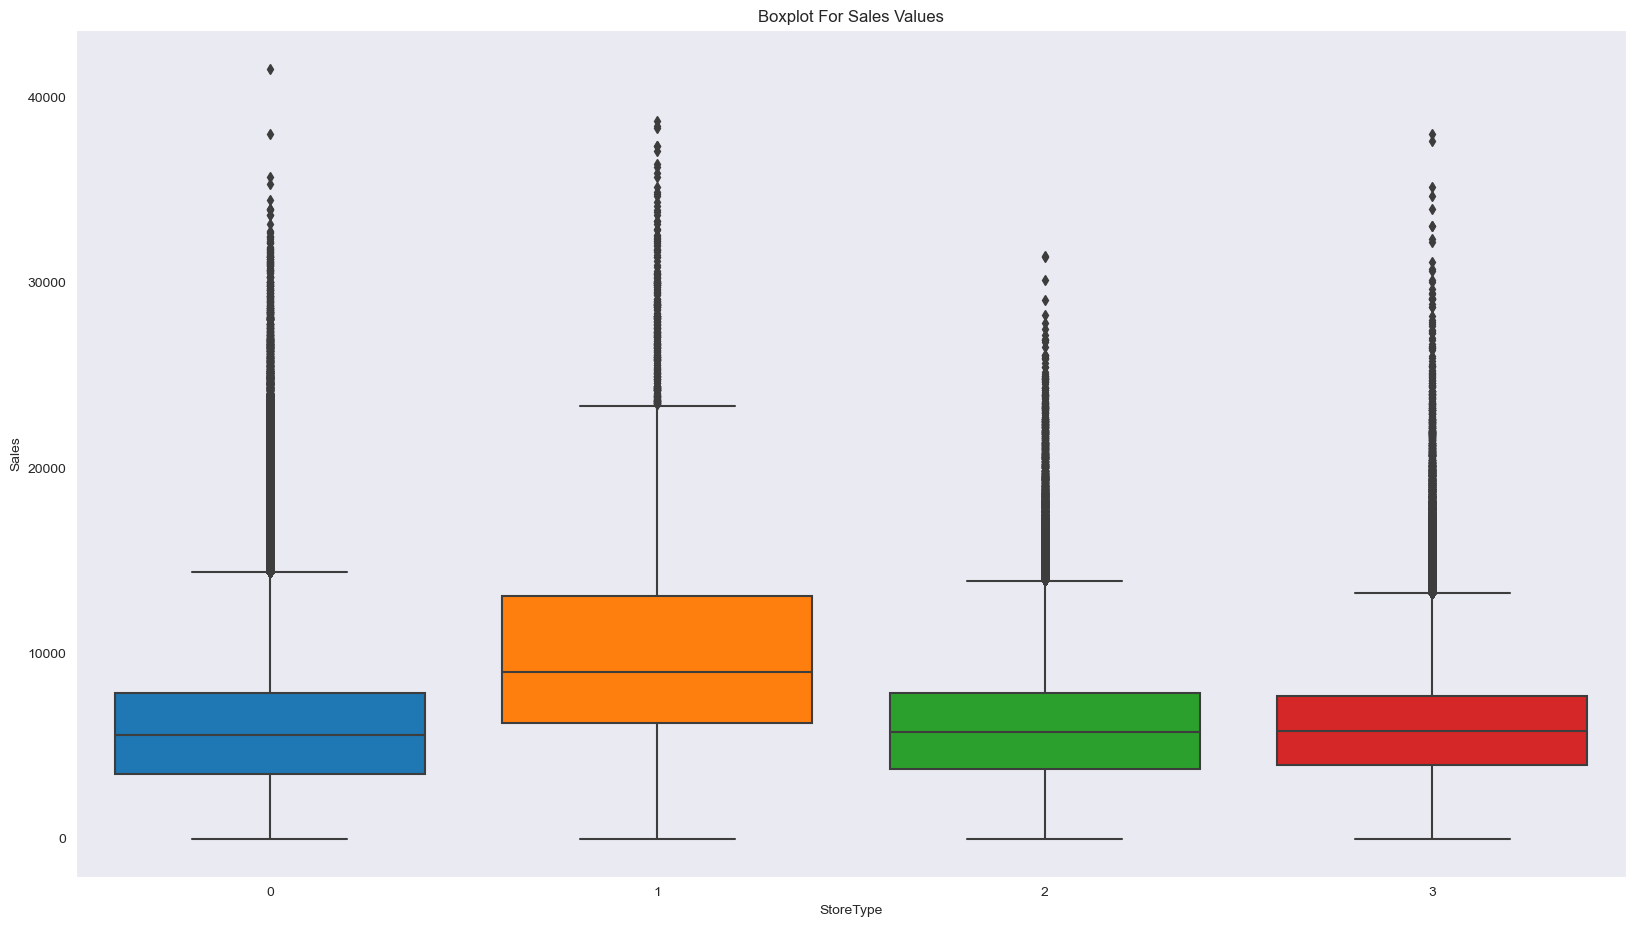

In [33]:
plt.figure(figsize=(20,11))
plot_storetype_sales = sns.boxplot(x='StoreType', y='Sales', data=finaltable1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

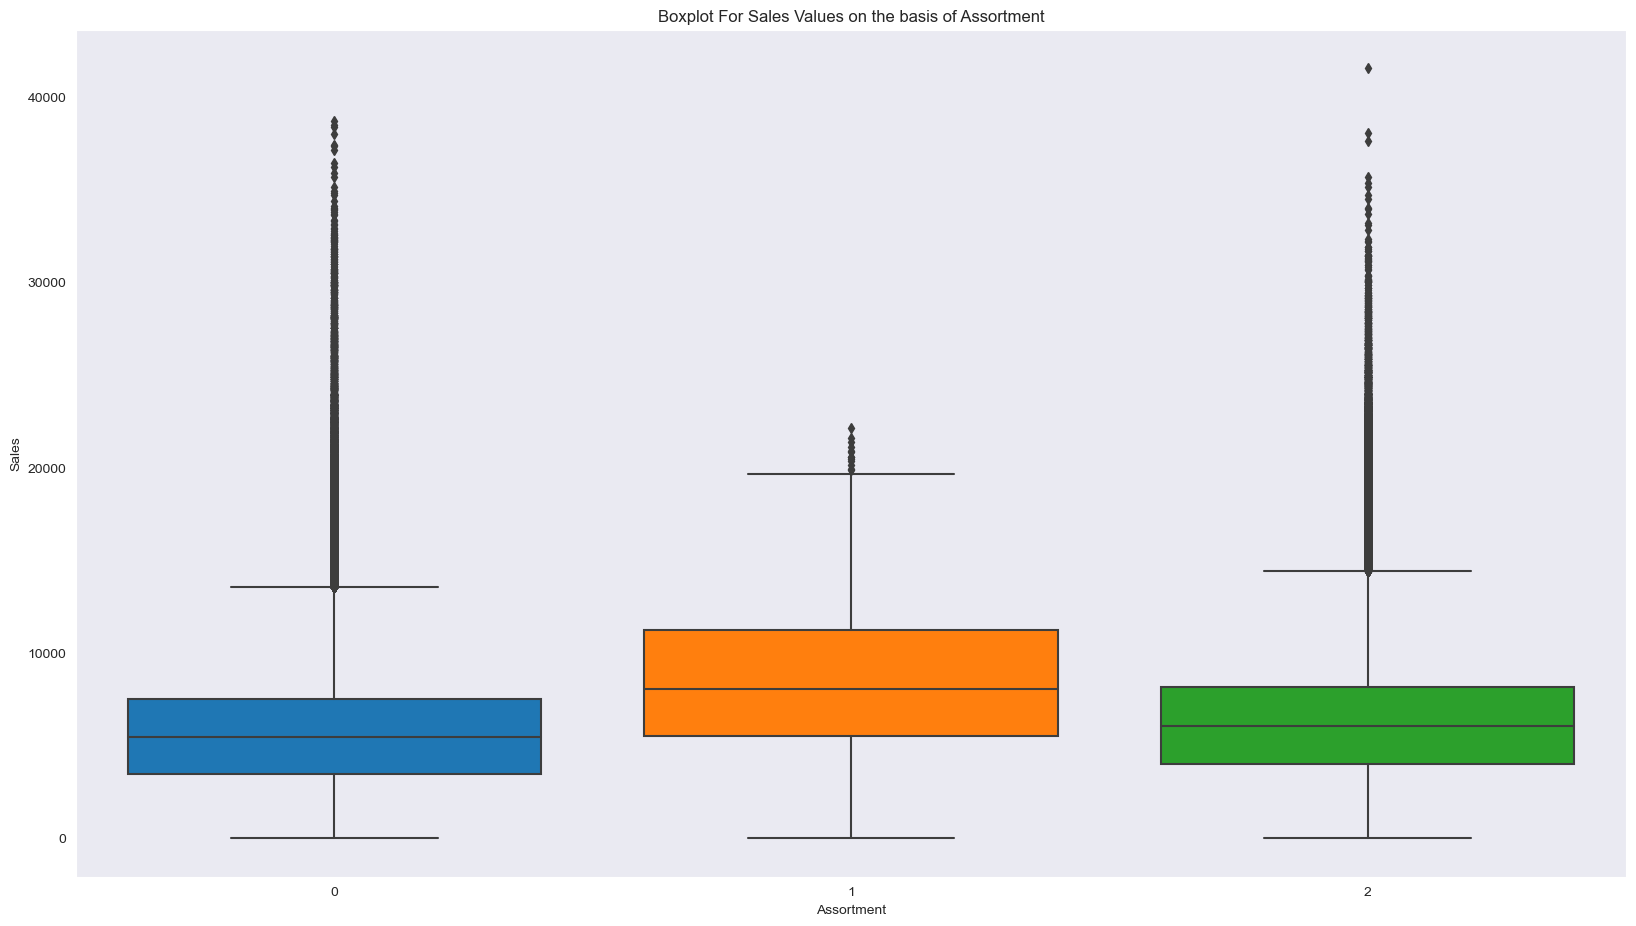

In [34]:
plt.figure(figsize=(20,11))
plot_storetype_sales = sns.boxplot(x='Assortment', y='Sales', data=finaltable1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

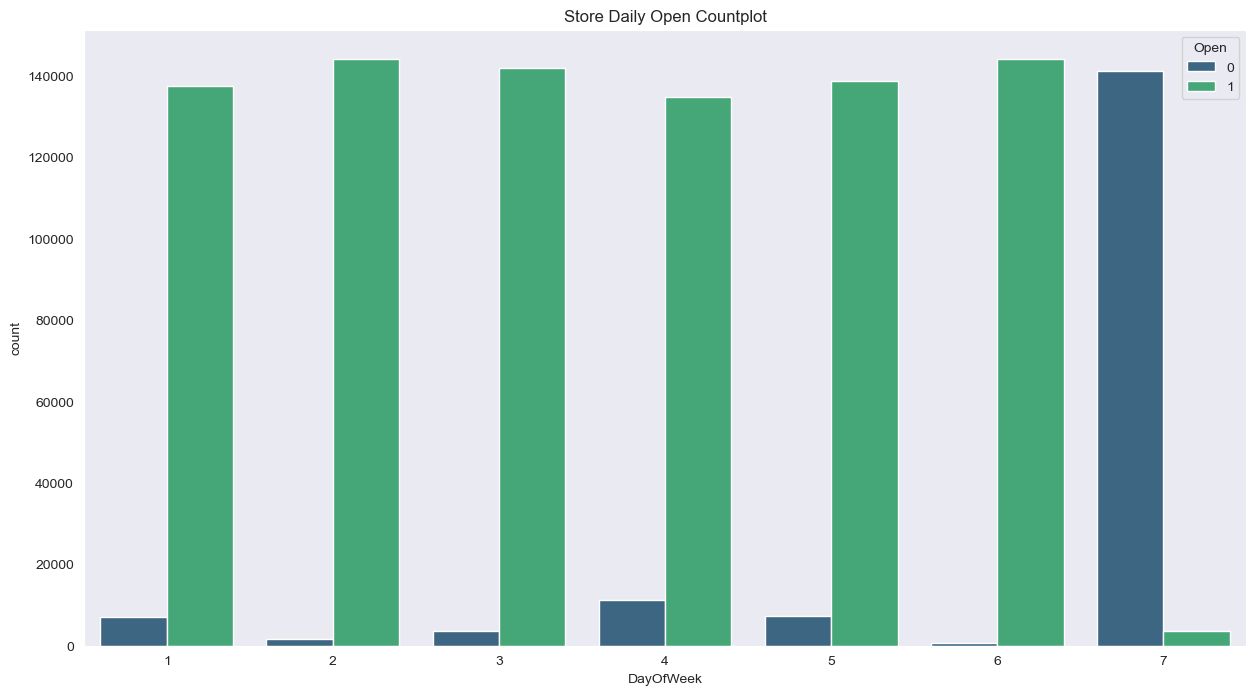

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'DayOfWeek' , hue='Open', data=finaltable1, palette='viridis')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

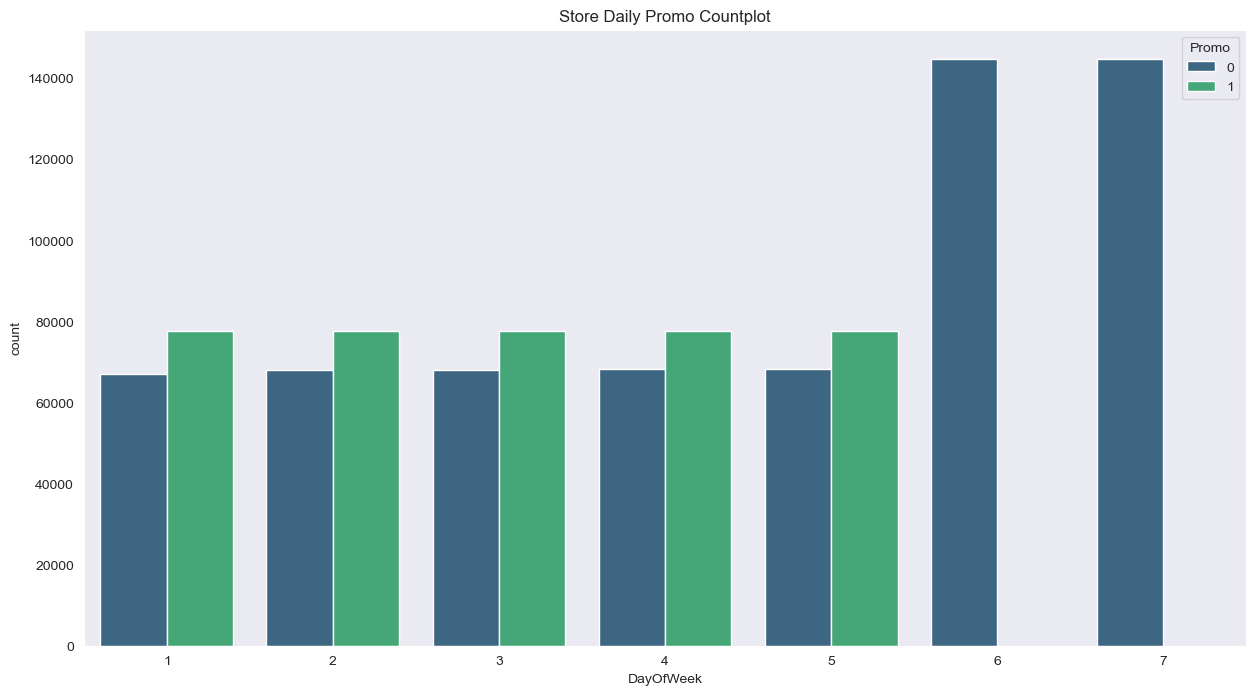

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'DayOfWeek' , hue='Promo', data=finaltable1, palette='viridis')
plt.title('Store Daily Promo Countplot')

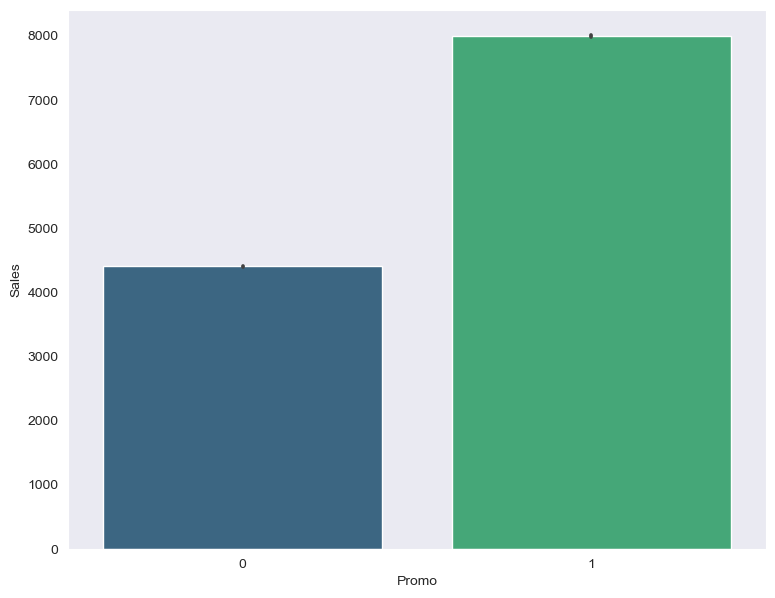

In [37]:
plt.figure(figsize=(9,7))
promo_sales= sns.barplot(x='Promo', y='Sales', data=finaltable1, palette='viridis')

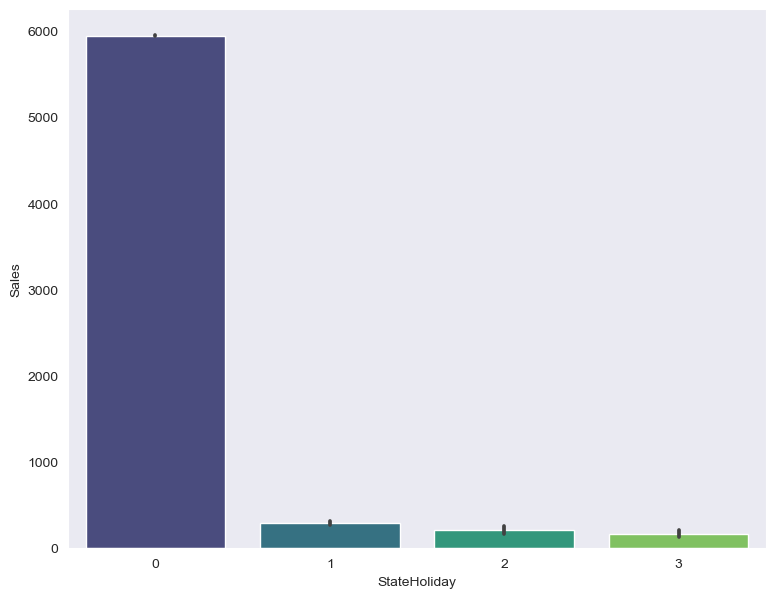

In [38]:
plt.figure(figsize=(9,7))
stateholiday_sales= sns.barplot(x='StateHoliday', y='Sales', data=finaltable1, palette='viridis')

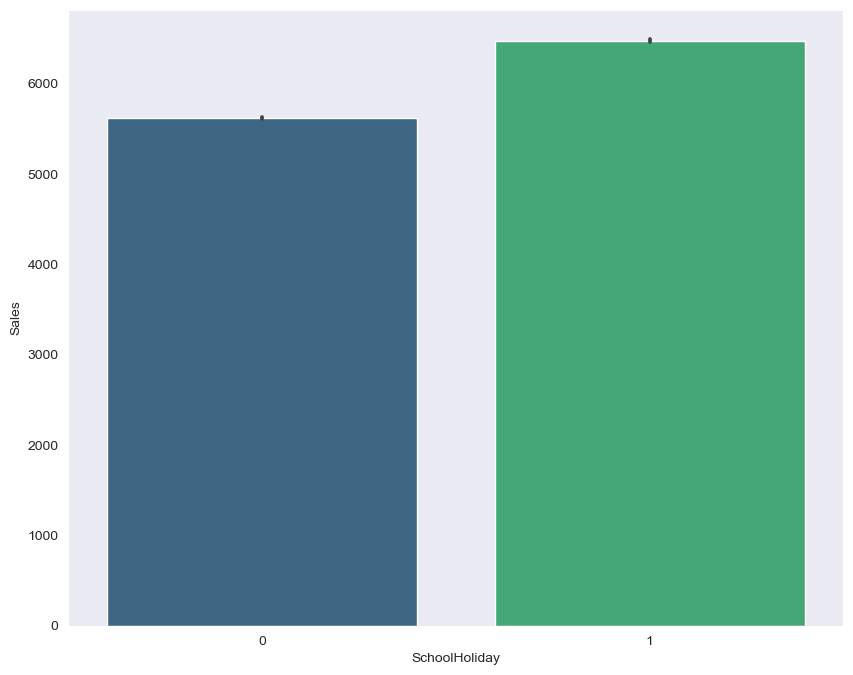

In [39]:
plt.figure(figsize=(10,8))
schoolholiday_sales= sns.barplot(x='SchoolHoliday', y='Sales', data=finaltable1, palette='viridis')

C:\Users\Dell\AppData\Local\Temp\ipykernel_1520\1846501504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = finaltable1.corr()


<Axes: >

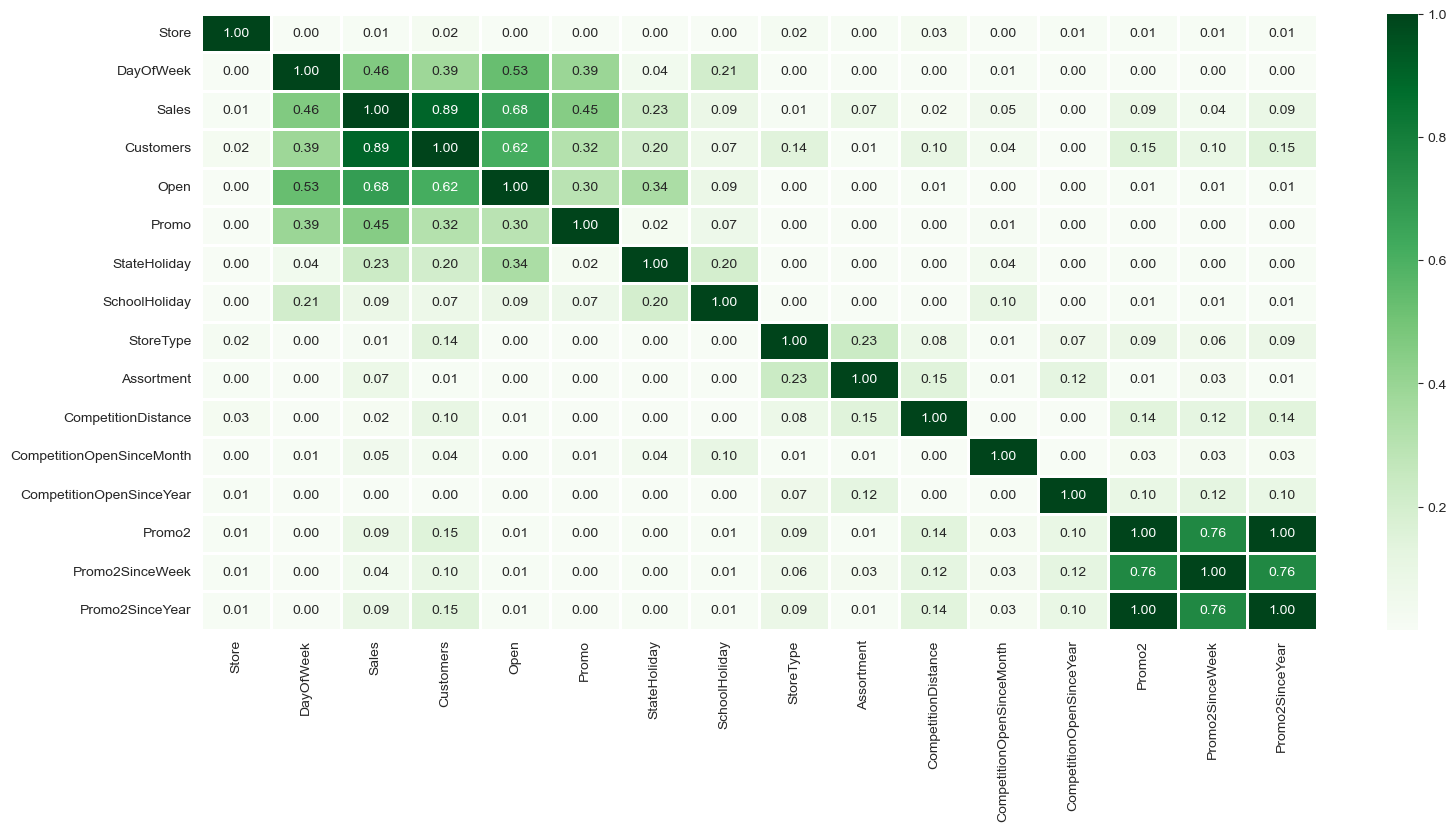

In [40]:
plt.figure(figsize=(18,8))
correlation = finaltable1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Greens', linewidths=2, fmt=".2f")

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [42]:
calc_vif(finaltable1[[i for i in finaltable1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


In [43]:
calc_vif(finaltable1[[i for i in finaltable1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


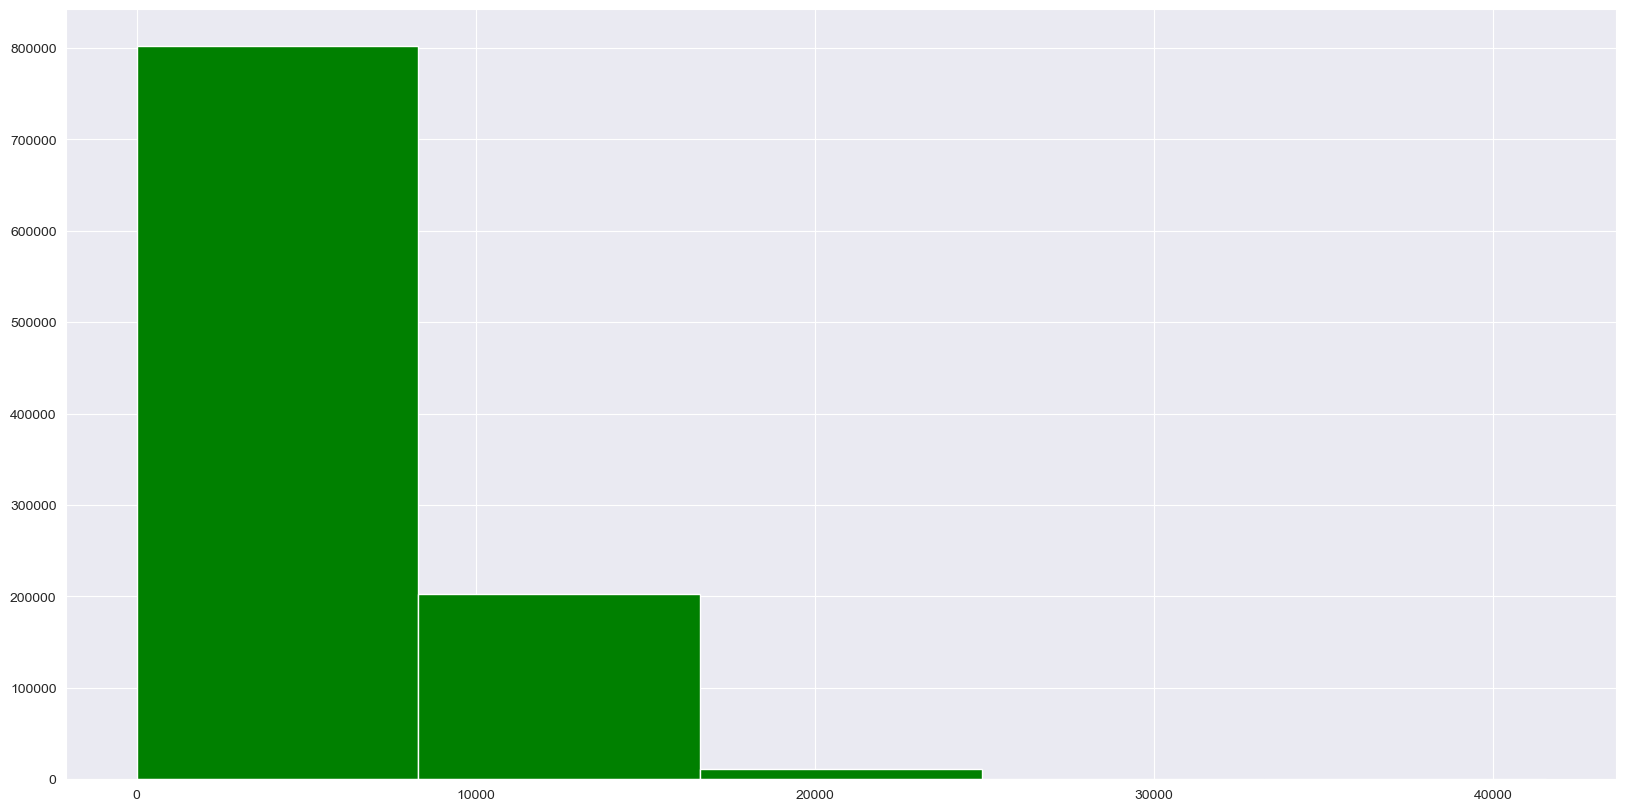

In [44]:
pd.Series(finaltable1['Sales'],).hist(bins=5, color="g")
plt.show()

In [45]:
finaltable1[(finaltable1.Open==0) & (finaltable1.Sales==0)].count()[0]

172817

In [46]:
updated_df =finaltable1.drop(finaltable1[(finaltable1.Open==0) & (finaltable1.Sales==0)].index)

In [47]:
display(updated_df)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


In [48]:
updated_df = pd.get_dummies(updated_df, columns=['PromoInterval'])

In [49]:
updated_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [50]:
finaltable1= pd.get_dummies(finaltable1, columns=['PromoInterval'])

In [51]:
finaltable1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [52]:
dep_var = 'Sales'
indep_var = finaltable1.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])

In [53]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [54]:
U = finaltable1[indep_var].values
V = finaltable1[dep_var].values

In [55]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]], dtype=int64)

In [56]:
V

array([5263, 6064, 8314, ...,    0,    0,    0], dtype=int64)

In [57]:
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [58]:
U_train, U_test, V_train, V_test = train_test_split(U,V,test_size=0.2, random_state=0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


In [59]:
scaler=StandardScaler()
U_train=scaler.fit_transform(U_train)
U_test=scaler.transform(U_test)

In [60]:
linear_regression= LinearRegression()
linear_regression.fit(U_train, V_train)

LinearRegression()

In [61]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7097.33073512, 12611.66667262,  9197.90495387, ...,
        6936.24870387,  6000.44792262,  4002.84636012])

In [62]:
linear_regression.score(U_train, V_train)

0.8677979747340396

In [63]:
regression_Dataframe = pd.DataFrame(zip(V_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7097.330735
1,6221,12611.666673
2,8132,9197.904954
3,20916,11531.420579
4,5472,6598.717454
...,...,...
203437,5650,6658.811204
203438,5464,6525.049485
203439,6191,6936.248704
203440,5663,6000.447923


In [64]:
sales_mean=finaltable1[dep_var].mean()
sales_mean

5773.818972305593

In [65]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(V_test, v_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)
RMPSE = RMSE/sales_mean
print("RMPSE :" , RMPSE)
r2 = r2_score(V_test, v_pred)
print("R2 :" , r2)

MSE : 1944264.5809547754
RMSE : 1394.368882668706
RMPSE : 0.24149854530543216
R2 : 0.8684239518991863


In [66]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, V_train)
v_pred_dt = decision_tree.predict(U_test)
V_train_dt = decision_tree.predict(U_train)
MSE = mean_squared_error(V_test, v_pred_dt)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)
RMPSE = RMSE/sales_mean
print("RMPSE :" , RMPSE)
r2 = r2_score(V_test, v_pred_dt)
print("R2 :" , r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [68]:
random_forest=RandomForestRegressor(n_estimators=150, max_depth=8, n_jobs=2)
random_forest.fit(U_train, V_train)
v_pred_rf = random_forest.predict(U_test)
MSE = mean_squared_error(V_test, v_pred_rf)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)
RMPSE = RMSE/sales_mean
print("RMPSE :" , RMPSE)
r2 = r2_score(V_test, v_pred_rf)
print("R2 :" , r2)

MSE : 1120382.523638947
RMSE : 1058.4812344292868
RMPSE : 0.18332428493278785
R2 : 0.9241792982983635


In [70]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators=150, learning_rate=0.01)
adaboost.fit(U_train, V_train)
v_pred_ada= adaboost.predict(U_test)
MSE = mean_squared_error(V_test, v_pred_ada)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)
RMPSE = RMSE/sales_mean
print("RMPSE :" , RMPSE)
r2 = r2_score(V_test, v_pred_ada)
print("R2 :" , r2)

MSE : 2378996.849715641
RMSE : 1542.3997049129778
RMPSE : 0.2671368313262286
R2 : 0.8390039056432564


In [87]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(n_estimators=150, max_depth=8, n_jobs=2)
xgboost.fit(U_train, V_train)
v_pred_xgb= xgboost.predict(U_test)
MSE = mean_squared_error(V_test, v_pred_xgb)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)
RMPSE = RMSE/sales_mean
print("RMPSE :" , RMPSE)
r2 = r2_score(V_test, v_pred_xgb)
print("R2 :" , r2)

MSE : 207021.7351949349
RMSE : 454.99641228798157
RMPSE : 0.07880337337737714
R2 : 0.9859900231404995
